## Content:

### 1. Importing libraries and data
### 2. Conduct consistency checks
### 3. Data preparation for regression analysis
### 4. Regression analysis


### 1. Importing libraries and data

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
# Make created grpahs to be displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [61]:
path =r'C:\Users\Lemlem TH\Desktop\careerfoundry\course\data immersion\Achievement 6\Agri_food_emission_analysis'

In [62]:
df = pd.read_csv(os.path.join(path, '02_Data','Prepared data', 'agri_food_emission.csv'))

### 2. Conduct consistency checks

In [63]:
df.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

In [64]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Albania,1990,5.5561,7.0253,59.2391,23.5200,110.5705,2.0,46.9645,72.8581,...,474.6951,0.0,0.0,320.8805,2086075.0,1195379.0,1676902.0,1618163.0,3475.291240,0.735750
1,Albania,1991,5.5561,7.0253,31.4625,6.2720,110.5705,2.0,47.9519,72.8581,...,469.1415,0.0,0.0,195.1879,2073348.0,1202083.0,1675168.0,1626914.0,5680.135772,-0.461500
2,Albania,1992,5.5561,7.0253,29.9373,1.8816,110.5705,2.0,40.5272,72.8581,...,453.2180,0.0,0.0,163.1332,2033508.0,1207079.0,1670550.0,1633189.0,5221.131572,0.318250
3,Albania,1993,5.5561,7.0253,44.0550,1.0976,110.5705,2.0,57.6592,72.8581,...,481.3836,0.0,0.0,126.8489,1983942.0,1205641.0,1663515.0,1637195.0,5316.973272,0.270500
4,Albania,1994,5.5561,7.0253,42.4253,0.0000,110.5705,3.0,72.4242,72.8581,...,620.2991,0.0,0.0,94.9545,1936056.0,1204539.0,1654796.0,1639203.0,5564.287672,1.202667


In [65]:
df.shape

(4546, 31)

#### Deriving variables

In [66]:
# Creat a new variable that represents total population 

df['Total Population']=df['Total Population - Male'] + df['Total Population - Female'] 

In [67]:
# Creat a new variable that represents per capita emission

df['Per Capita Emission']=(df['total_emission']/(df['Total Population']))

In [68]:
# Rename the column name Area

df.rename(columns = {'Area' : 'Country'},inplace = True)

##### Missing values check

In [69]:
# Check for missing values

df.isnull().sum()  # No missin value 

Country                            0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
Fires in organic soils             0
Fires in humid tropical forests    0
On-farm energy use                 0
Rural population                   0
Urban population                   0
T

##### Duplicates check

In [70]:
dups = df.duplicated()

In [71]:
dups.shape # No duplicates found

(4546,)

##### Extreme values checks

C:\Users\Lemlem TH\AppData\Local\Temp\ipykernel_15568\2263158074.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Per Capita Emission'], bins=100) # Shows extreme values


<Axes: xlabel='Per Capita Emission', ylabel='Density'>

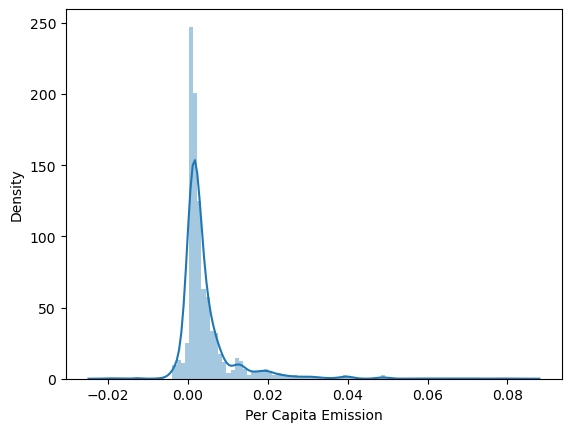

In [72]:
sns.distplot(df['Per Capita Emission'], bins=100) # Shows extreme values



In [73]:
# Clean extreme values

df = df[df['Per Capita Emission'] < 0.04] 
# CAUTION : The choice of 0.04 is only based on looking at the distribution of the data otherwise no scientific support to backup this choice 

In [74]:
df['Per Capita Emission'].mean() # Check the mean

0.004115769921253751

In [75]:
df['Per Capita Emission'].median() # Check the median

0.0021819799137720013

In [76]:
df['Per Capita Emission'].max() # Check the max

0.03989508961549417

<Axes: xlabel='Average Temperature °C', ylabel='Count'>

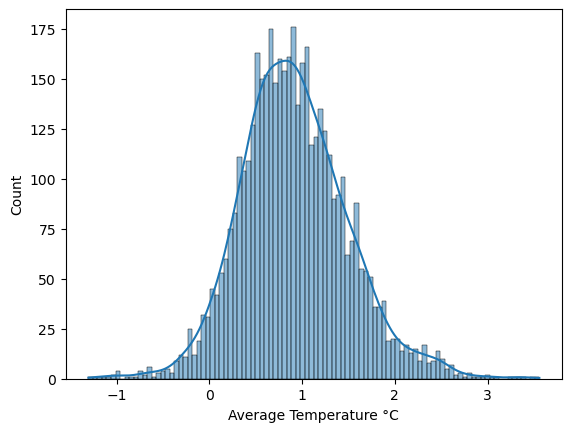

In [77]:
sns.histplot(df['Average Temperature °C'], bins=100, kde = True) # shows the distribution for 'Average Temperature °C'

In [78]:
df['Average Temperature °C'].mean() # Check the mean

0.9168675382620377

In [79]:
df['Average Temperature °C'].median() # Check the median

0.8808333333333334

In [80]:
df['Average Temperature °C'].max() # Check the max

3.5580833333333337

### 3. Data preparation for regression analysis 

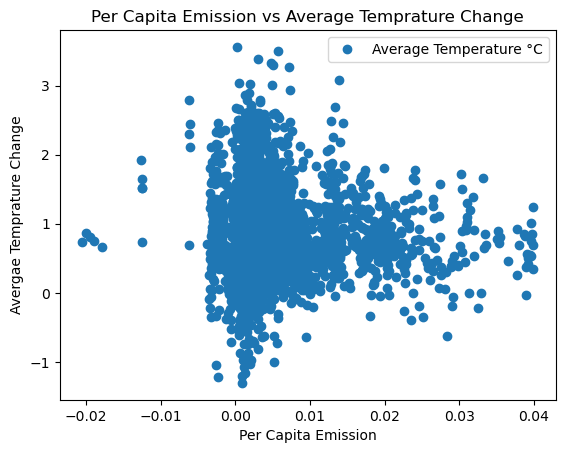

In [81]:
# Create a scatterplot using matplotlib to see how the chosen variables plot against each other.

df.plot(x = 'Per Capita Emission', y='Average Temperature °C',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Per Capita Emission vs Average Temprature Change')  
plt.xlabel('Per Capita Emission')  
plt.ylabel('Avergae Temprature Change')  
plt.show()

The hypothesis I am interested to explore is that there is a linear relationship between per capita agri-food emission and change in local temprature. I am hypothesizing that an increase in per capita emission will have an increasing effect in temprature.

In [82]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Per Capita Emission'].values.reshape(-1,1)
y = df['Average Temperature °C'].values.reshape(-1,1)

In [83]:
X

array([[0.0010547 ],
       [0.00172017],
       [0.00158037],
       ...,
       [0.00648865],
       [0.0064468 ],
       [0.00615873]])

In [84]:
y

array([[ 0.73575   ],
       [-0.4615    ],
       [ 0.31825   ],
       ...,
       [ 0.51633333],
       [ 0.98566667],
       [ 0.189     ]])

In [85]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [86]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [87]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [88]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

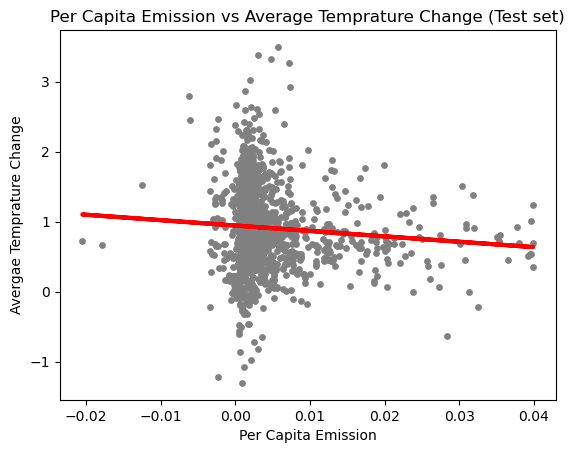

In [89]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Per Capita Emission vs Average Temprature Change (Test set)')
plot_test.xlabel('Per Capita Emission')
plot_test.ylabel('Avergae Temprature Change')
plot_test.show()

The scatter plot suggests that the regression line fit the data poorly. As one can see there is a wide dispersion of points where the x-axis values are around 0.00.

In [90]:
# Create objects that contain the model summary statistics (MSE and R2).

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [91]:
# Print the model summary statistics. This is where we can evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-7.71184094]]
Mean squared error:  0.34409681124530556
R2 score:  0.011468048089043226


In [92]:
y_predicted

array([[0.92085672],
       [0.92597829],
       [0.92923119],
       ...,
       [0.92559636],
       [0.92185582],
       [0.92006656]])

In [93]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.763167,0.920857
1,0.854583,0.925978
2,0.639750,0.929231
3,1.057083,0.945436
4,1.721083,0.843604
5,0.711167,0.851542
6,0.438583,0.853803
7,0.809000,0.940015
8,0.796417,0.882107
9,0.687083,0.913820


The R2 value 0.011 shows that the model performs poorly. Also the comparision of the actual and predicted y values displayed above in the data frame suggest that there is a significant difference between the actual and predicted y values.

##### Comparing how the regression fits the training set

In [94]:
# Predict.

y_predicted_train = regression.predict(X_train) # Predicting X_train!

In [95]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [96]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-7.71184094]]
Mean squared error:  0.32956377820057564
R2 score:  0.005964473961053152


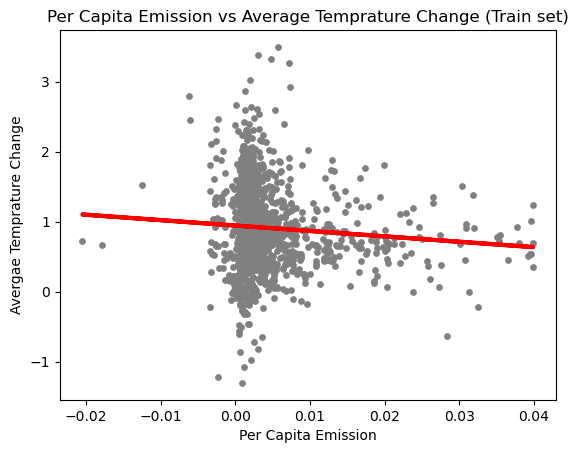

In [97]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Per Capita Emission vs Average Temprature Change (Train set)')
plot_test.xlabel('Per Capita Emission')
plot_test.ylabel('Avergae Temprature Change')
plot_test.show()



- Similar to the test dataset, the performance of the model on the training dataset is poor.
- One could assume that the relationship between emissiona and temprature might be more complicated that there are other variables which needed to be includd in the model